In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregar les dades
file_path = 'wine-clustering.csv'
data = pd.read_csv(file_path)  
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


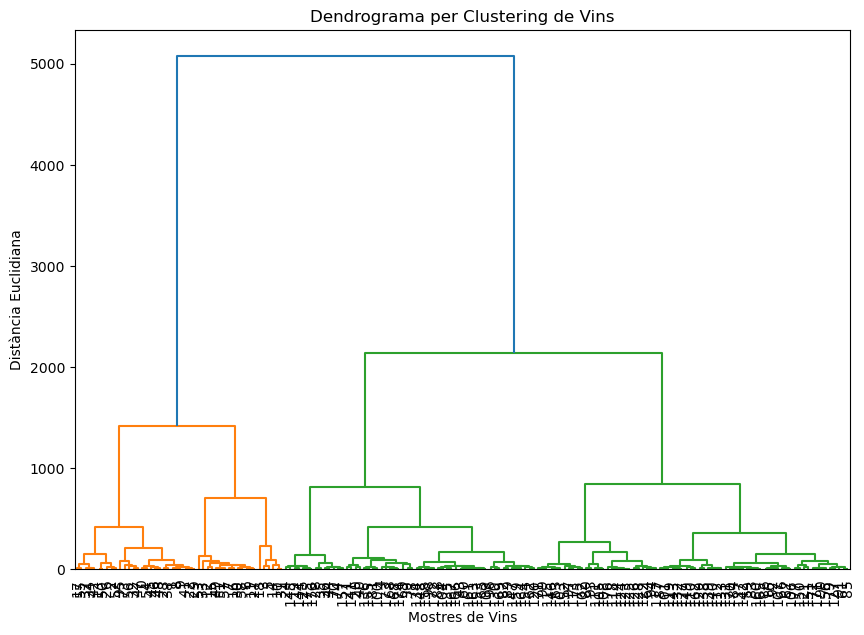

In [7]:
# Escollim les columnes que volem utilitzar per al clustering
# Excloent el nom del vi o qualsevol columna que no vulguem que influeixi
data = data[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
             'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]

# Generar l'agrupació jeràrquica (metodologia linkage)
Z = linkage(data, method='ward')  # 'ward' és un mètode comú per al clustering jeràrquic

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma per Clustering de Vins')
plt.xlabel('Mostres de Vins')
plt.ylabel('Distància Euclidiana')
plt.show()


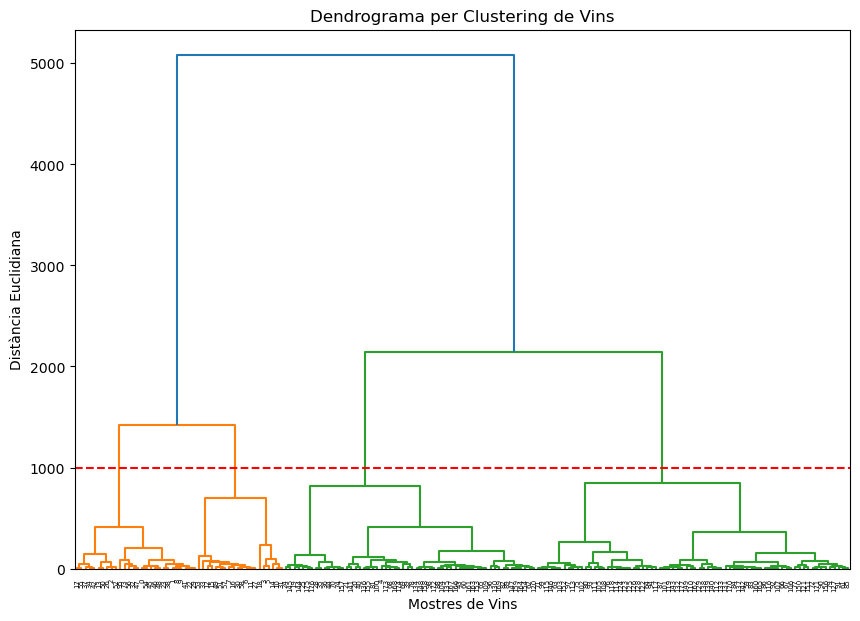

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        1  
1   3.40     1050        1  
2   3

In [11]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, t=3, criterion='maxclust')

# Afegir els clústers al DataFrame per veure a quin clúster pertany cada vi
data['Cluster'] = clusters

# Visualitzar el dendrograma amb la línia de tall
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=1000, color='r', linestyle='--')  # Línia de tall (ajusta l'altura si cal)
plt.title("Dendrograma per Clustering de Vins")
plt.xlabel("Mostres de Vins")
plt.ylabel("Distància Euclidiana")
plt.show()

# Mostrar els primers registres amb els clústers assignats
print(data.head())